In [38]:
#Imports all the neccisary modules some went unused
from sklearn import preprocessing
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import svm as svm
import seaborn as sns
#https://scikit-learn.org/stable/modules/impute.html

In [39]:
#Removes all coluumns that seemed unlikely to be useful
le = preprocessing.LabelEncoder()
df = pd.read_csv('accident_data.csv') # This line specifically declares what database to look at
df.drop('Did_Police_Officer_Attend_Scene_of_Accident', inplace=True, axis=1)
df.drop('Date', inplace=True, axis=1)
df.drop('Police_Force', inplace=True, axis=1)
df.drop('InScotland', inplace=True, axis=1)
df.drop('1st_Road_Number', inplace=True, axis=1)
df.drop('2nd_Road_Number', inplace=True, axis=1)
df.drop('Accident_Index', inplace=True, axis=1)
df.drop('Local_Authority_(District)', inplace=True, axis=1)
df.drop('Local_Authority_(Highway)', inplace=True, axis=1)

In [40]:
#Transforms all the remaining data into numbers making the data easier to process
df['1st_Road_Class'] = le.fit_transform(df['1st_Road_Class'])
df['2nd_Road_Class'] = le.fit_transform(df['2nd_Road_Class'])
df['Junction_Control'] = le.fit_transform(df['Junction_Control'])
df['Junction_Detail'] = le.fit_transform(df['Junction_Detail'])
df['Day_of_Week'] = le.fit_transform(df['Day_of_Week'])
df['Carriageway_Hazards'] = le.fit_transform(df['Carriageway_Hazards'])
df['Road_Surface_Conditions'] = le.fit_transform(df['Road_Surface_Conditions'])
df['Road_Type'] = le.fit_transform(df['Road_Type'])
df['Special_Conditions_at_Site'] = le.fit_transform(df['Special_Conditions_at_Site'])
df['Urban_or_Rural_Area'] = le.fit_transform(df['Urban_or_Rural_Area'])
df['Weather_Conditions'] = le.fit_transform(df['Weather_Conditions'])
df['Time'] = le.fit_transform(df['Time'])
df['Light_Conditions'] = le.fit_transform(df['Light_Conditions'])
df['Accident_Severity'] = le.fit_transform(df['Accident_Severity'])
df['LSOA_of_Accident_Location'] = le.fit_transform(df['LSOA_of_Accident_Location'])

In [41]:
df.head()

,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Day_of_Week,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Location_Easting_OSGR,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,0,6,1,1,5,3,4,51.489096,5,525680.0,...,0.0,1.0,4,3,5,30,1061,2,5,2005
1,2,3,2,1,6,2,0,51.520075,1,524170.0,...,0.0,5.0,0,0,5,30,1055,2,1,2005
2,3,6,2,1,4,3,4,51.525301,1,524520.0,...,0.0,0.0,0,3,5,30,14,2,1,2005
3,0,6,2,1,0,3,4,51.482442,5,526900.0,...,0.0,0.0,0,3,5,30,634,2,1,2005
4,5,6,2,1,1,3,4,51.495752,0,528060.0,...,0.0,0.0,4,3,5,30,1272,2,1,2005


In [42]:
#Removes all missing values and replaces them with the most commonly occuring value
#In retrospect all previous ones could be for loops but they were already written when i realised this :(
for column in df:
    df[column] = df[column].fillna(df[column].mode()[0])

In [43]:
#https://www.youtube.com/watch?v=3Spa10-mwsw
#video above used in help with all cluster code
import sklearn.cluster as cluster 
kmeans = cluster.KMeans(n_clusters=10 , init="k-means++") #Declares the type of clustering and the amount of clusters
kmeans = kmeans.fit(df) #fits the data all into clusters

In [44]:
df['Clusters'] = kmeans.labels_ #makes a new column which labels the data with what cluster it was assigned to

In [45]:
df['Clusters'].value_counts() #Shows how many items were assigned to each cluster

1    288806
7    143432
0    142697
5    114107
8     78586
4     76112
2     60954
9     59643
6     53337
3     30901
Name: Clusters, dtype: int64

In [46]:
X = df.drop('Accident_Severity', axis=1) # X is all values except accident severity
y = df['Accident_Severity'] # y is all values in accident severity

In [47]:
# from sklearn.impute import SimpleImputer
# #Specify the strategy to be the median class
# fea_transformer = SimpleImputer(strategy="median")
# values = fea_transformer.fit_transform(df[["Carriageway_Hazards"]])
# pd.DataFrame(values)
# fea_transformer = SimpleImputer(strategy="median")
# values = fea_transformer.fit_transform(df[["1st_Road_Class"]])
# pd.DataFrame(values)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0) #Makes 25% of the data testing then attempts to predict the other 75

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)  #formats data for linear regression model
accuracy = model.score(X_test,y_test) #gives model accuracy after scoring it against the test data
print("Model accuraccy: {:.2f}".format(accuracy)) #outputs accuracy in nice format

Model accuraccy: 0.04


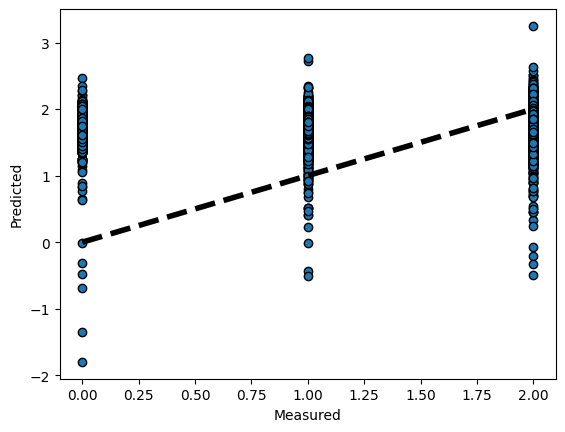

In [50]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)

model.fit(X_train, y_train) #Fits the model for neural networks

MLPClassifier(random_state=0)

In [52]:
y_train_pred = model.predict(X_train) #makes valuables that hold the predictions values of the training and testing data
y_test_pred = model.predict(X_test)

In [53]:
print("Predicted values:", y_test_pred)
print("Actual    values:", y_train_pred)

Predicted values: [2 2 2 ... 2 2 2]
Actual    values: [2 2 2 ... 2 2 2]


In [54]:
train_score = model.score(X_train, y_train) #stores the scores of both the training and the test
test_score = model.score(X_test, y_test)

In [55]:
print('Training score: {:.3f}'.format(train_score)) #outputs the scores showing the accuracy of the data
print('Test score: {:.3f}'.format(test_score))

Training score: 0.854
Test score: 0.854


InvalidIndexError: (slice(None, None, None), 0)

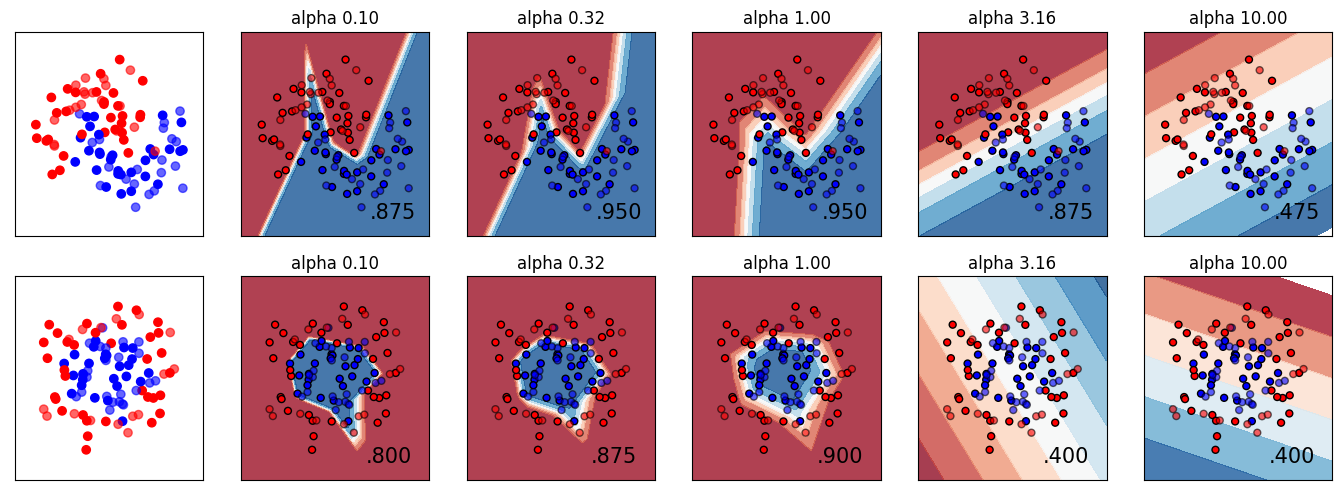

In [63]:
#https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

In [ ]:
#sns.scatterplot(x="Road_Type", y="Accident_Severity",hue = 'Clusters', data=clusterpredict)

In [ ]:
#pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15,15), marker='o', s=60, alpha=0.8, cmap=plt.cm.Set1, edgecolor='k')